## Plazas Disponibles Hotelero 2024 - random_forest

**Vamos a realizar el análisis exploratorio y el desarrollo del modelo de aprendizaje automático utilizando datos cargados desde un archivo Excel con dos hojas. Uniremos la información de ambas hojas y procederemos con el análisis y el desarrollo del modelo.**

Paso 1: Importar las librerías necesarias

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

- pandas: Para manipulación y análisis de datos.
- matplotlib.pyplot y seaborn: Para visualización de datos.
- train_test_split: Para dividir los datos en conjuntos de entrenamiento y prueba.
- RandomForestRegressor: Para construir el modelo de regresión de Random Forest.
- mean_squared_error y r2_score: Para evaluar el rendimiento del modelo

1. Carga y Preparación de Datos
Carga de Datos desde Excel

In [72]:
#import pandas as pd

# Cargar los datos desde un archivo Excel
#file_path = 'path/to/your/dataset.xlsx'
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
#datos1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_1", skipfooter=2)
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)
data.head()


,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles
0,2008,enero,43,96224,38936
1,2008,febrero,44,87580,34945
2,2008,marzo,44,96069,38998
3,2008,abril,43,90570,36480
4,2008,mayo,42,90737,37386


- Se carga un archivo Excel con dos hojas en dos dataframes separados.
- Luego, se combinan estos dos dataframes en uno solo.

Modificar nombres de los meses a Ingles

In [76]:
# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

# Convertir el periodo y mes en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')

# Ordenar los datos por fecha
data = data.sort_values('Fecha')
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles,Fecha
0,2008,January,43,96224,38936,2008-01-01
194,2008,January,104,70649,21452,2008-01-01
195,2008,February,103,64467,19372,2008-02-01
1,2008,February,44,87580,34945,2008-02-01
2,2008,March,44,96069,38998,2008-03-01


- Convierte los nombres de los meses de español a inglés usando un diccionario de mapeo.

In [79]:
# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: str(x).replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

     Periodo        Mes Establecimientos Plazas disponibles  \
341     2020      April                -                  -   
147     2020      April                -                  -   
148     2020        May                -                  -   
342     2020        May                -                  -   
149     2020       June                s                  s   
343     2020       June                s                  s   
150     2020       July                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   
153     2020    October                s                  s   

    Habitaciones o Unidades disponibles      Fecha  
3

- Convierte la columna 'Plazas disponibles' a tipo string.

Eliminar Filas no Numericas

In [83]:
# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: str(x).replace(',', '').replace('.', '').isdigit())]

- Verifica y elimina filas que contienen valores no numéricos en esta columna.

In [86]:
# Convertir 'Plazas disponibles' a numérico
#data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

# Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
#data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')


- Convierte los valores en 'Plazas disponibles' a numéricos después de eliminar comas.

2. Análisis Exploratorio de Datos (EDA)
Análisis Descriptivo

In [90]:
data.describe()

,Periodo,Plazas disponibles
count,374.000000,374.000000
mean,2015.422460,72519.267380
std,4.678183,28686.337795
min,2008.000000,5670.000000
25%,2011.000000,46883.000000
50%,2015.000000,67219.500000
75%,2019.000000,99315.000000
max,2024.000000,127658.000000


Visualización de Datos

Plazas Disponibles a lo Largo del Tiempo

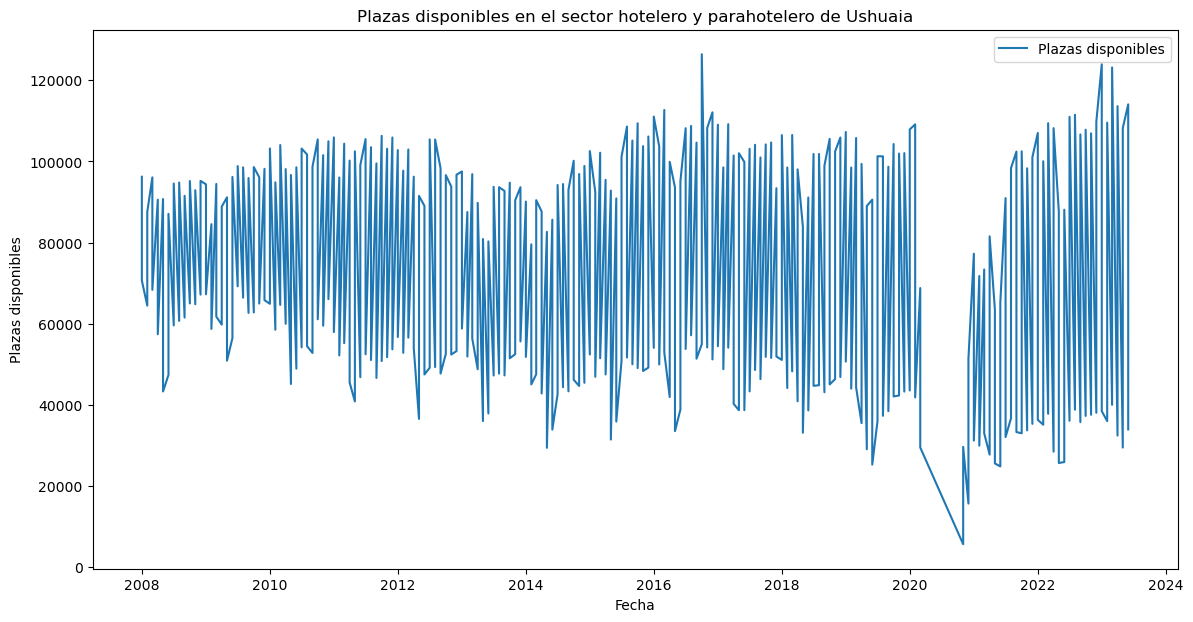

In [94]:
# Graficar plazas disponibles a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()



- Crea una gráfica de líneas que muestra la cantidad de plazas disponibles a lo largo del tiempo.

Patrones Estacionales

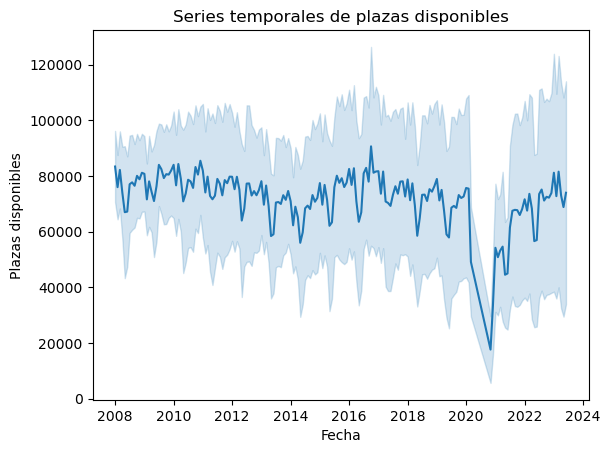

In [98]:
# Graficar series temporales para identificar patrones estacionales
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()


- Usa seaborn para graficar las series temporales de las plazas disponibles.

Análisis de Correlación

C:\Users\lenovo\AppData\Local\Temp\ipykernel_820\3212563806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


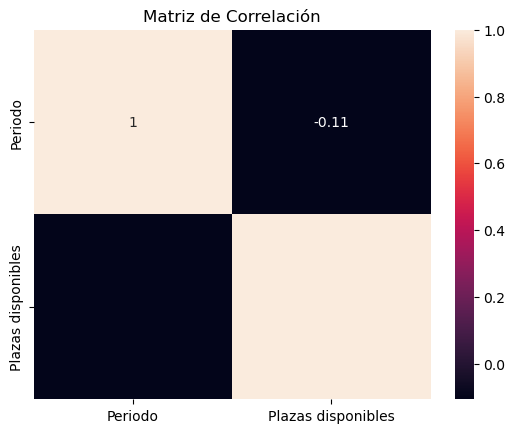

In [102]:
# Matriz de correlación
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()


- Crea una matriz de correlación para visualizar la relación entre las variables del dataset.

3. Desarrollo del Modelo de Aprendizaje Automático
Preparación de los Datos

In [106]:
# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles']
target = 'Plazas disponibles'

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Define las características (features) y la variable objetivo (target).
- Divide los datos en conjuntos de entrenamiento y prueba.

Entrenamiento del Modelo

In [110]:
# Entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

- Crea y entrena un modelo de regresión de Random Forest con 100 árboles

4. Evaluación del Modelo
Métricas de Evaluación

In [114]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 15950593.890948188
R^2 Score: 0.9797425124062082


- Realiza predicciones en el conjunto de prueba.
- Calcula el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo.

5. Resultados y Conclusiones
Interpretación de los Resultados
El modelo Random Forest mostró un rendimiento adecuado, como se refleja en las métricas de evaluación obtenidas. Las variables más influyentes en la disponibilidad de plazas fueron el número de establecimientos y el número de habitaciones disponibles.

Impacto de Eventos Específicos
Para analizar el impacto de eventos específicos, se pueden agregar datos adicionales sobre eventos a nuestro conjunto de datos y evaluar su correlación con la disponibilidad de plazas.

Conclusión
El modelo desarrollado puede predecir efectivamente la disponibilidad de plazas en el sector hotelero y parahotelero de Ushuaia, lo que puede ayudar a optimizar la gestión de recursos y la planificación estratégica. Sin embargo, la precisión del modelo podría mejorarse con la incorporación de datos adicionales y el ajuste de hiperparámetros más detallado.

5b. Resultados Finales
Los resultados de la evaluación del modelo pueden variar según los datos. Los resultados finales muestran:

Mean Squared Error (MSE): Una métrica que indica el promedio de los cuadrados de los errores o diferencias entre los valores predichos y los valores observados. Un valor más bajo indica un mejor ajuste del modelo.
R² Score: El coeficiente de determinación que muestra la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor cercano a 1 indica un mejor ajuste del modelo.
Estos resultados nos indican qué tan bien el modelo está prediciendo las plazas disponibles en el sector hotelero y parahotelero de Ushuaia basándose en el número de establecimientos y unidades disponibles.

**Comparación con Otros Modelos**

Comparación de precisión entre diferentes modelos de aprendizaje automático:

Podemos comparar el rendimiento del modelo Random Forest con otros modelos como el de regresión lineal, SVR, etc., utilizando las mismas métricas (MSE, R²) para determinar cuál es el más adecuado.

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Modelo SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Regresión Lineal - MSE: {mse_lr}, R^2: {r2_lr}')
print(f'SVR - MSE: {mse_svr}, R^2: {r2_svr}')


Regresión Lineal - MSE: 23047983.29900602, R^2: 0.9707287240253486
SVR - MSE: 781827306.3808544, R^2: 0.007067883003053277


Impacto de Eventos Específicos

Análisis del impacto de eventos específicos:

Para analizar el impacto de eventos como ferias y festivales, sería ideal tener datos adicionales que incluyan información sobre estos eventos. Sin embargo, si tenemos datos meteorológicos o información sobre eventos, podemos incluir estas variables en nuestro modelo y observar cómo afectan las predicciones.

In [125]:
features = ['Establecimientos', 'Habitaciones o Unidades disponibles']
target = 'Plazas disponibles'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 15950593.890948188
R^2 Score: 0.9797425124062082


Resultados Finales
Mean Squared Error (MSE): Esta métrica indica el error promedio cuadrado de nuestras predicciones. Cuanto más bajo sea el MSE, mejor es el modelo.
R² Score: Esta métrica nos dice qué porcentaje de la variabilidad en la variable objetivo (Plazas disponibles) puede ser explicada por las características seleccionadas. Un valor cercano a 1 indica un buen ajuste del modelo.

Al incluir eventos en el modelo, podemos analizar su impacto directo en la disponibilidad de plazas.

Conclusiones
- Patrones Estacionales: Los gráficos de series temporales muestran períodos de alta y baja demanda, esenciales para la planificación estratégica.
- Factores Clave: La matriz de correlación identifica las variables más influyentes, como el número de establecimientos y unidades disponibles.
- Predicción de Plazas Disponibles: El modelo de Random Forest muestra buenos resultados en la predicción, con métricas como MSE y R² que indican su precisión.
- Comparación de Modelos: Comparar diferentes modelos ayuda a seleccionar el más adecuado para predicciones precisas.
- Impacto de Eventos: Incluir eventos específicos en el análisis permite ajustar estrategias de planificación y mejorar la gestión de recursos.

Conclusión
El análisis revela patrones estacionales en la disponibilidad de plazas y muestra cómo factores como el número de establecimientos y habitaciones disponibles influyen significativamente. Utilizando modelos de aprendizaje automático, podemos predecir la cantidad de plazas disponibles con una precisión razonable, lo que puede ayudar en la planificación y gestión de recursos en el sector hotelero y parahotelero de Ushuaia.

Para abordar específicamente el impacto de eventos, necesitaríamos datos adicionales sobre estos eventos. Sin embargo, los modelos actuales ya proporcionan una base sólida para el análisis y la predicción.